### Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [3]:
# Counting number of images in train & test data
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels = 'inferred', label_mode = 'int', 
                                                              class_names = None, color_mode = 'rgb', batch_size = 32, 
                                                              image_size = (img_width, img_height), shuffle = True, seed = 123, 
                                                              validation_split = 0.2, subset = 'training', interpolation = 'bilinear', 
                                                              follow_links = False, smart_resize = False)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels = 'inferred', label_mode = 'int', 
                                                            class_names = None, color_mode = 'rgb', batch_size = 32, 
                                                            image_size = (img_width, img_height), shuffle = True, seed = 123, 
                                                            validation_split = 0.2, subset = 'validation', interpolation = 'bilinear', 
                                                            follow_links = False, smart_resize = False)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

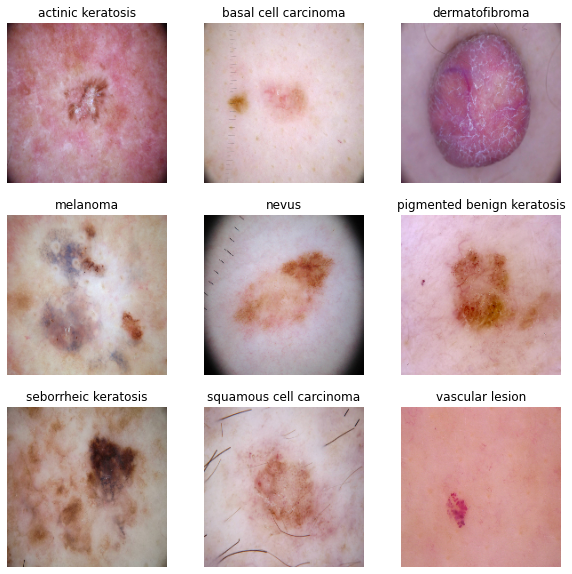

In [8]:
num_classes = len(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
plt.show()

In [9]:
# Checking shape of image_batch & label_batch
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 42s 625ms/step - loss: 1.9917 - accuracy: 0.2751 - val_loss: 1.9384 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 34s 611ms/step - loss: 1.7294 - accuracy: 0.3817 - val_loss: 1.6333 - val_accuracy: 0.4116
Epoch 3/20
56/56 [==============================] - 34s 606ms/step - loss: 1.6181 - accuracy: 0.4202 - val_loss: 1.7344 - val_accuracy: 0.4004
Epoch 4/20
56/56 [==============================] - 34s 610ms/step - loss: 1.5714 - accuracy: 0.4420 - val_loss: 1.4878 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 34s 602ms/step - loss: 1.4469 - accuracy: 0.4849 - val_loss: 1.4698 - val_accuracy: 0.4899
Epoch 6/20
56/56 [==============================] - 34s 610ms/step - loss: 1.3720 - accuracy: 0.5206 - val_loss: 1.5455 - val_accuracy: 0.4609
Epoch 7/20
56/56 [==============================] - 34s 603ms/step - loss: 1.2828 - accuracy: 0.5552 - val_loss: 1.3526 - val_accuracy: 0.5257

In [15]:
# View the summary of all the layers
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

### Visualizing training results

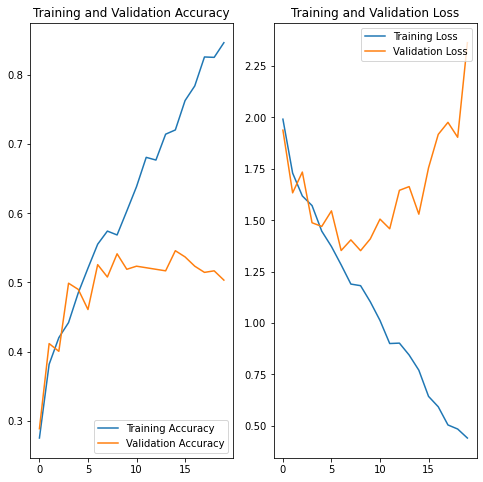

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In the plots above, training accuracy increases lineraly, however we see a stall of validation accuracy at around 50%. There is a huge difference in training accuracy and validation accuracy after nearly 5 epochs. This is clearly a sign of overfiiting.

This is due to small number of training examples, due to which the model tries to memorize each image present in dataset. The overfitted model will have difficulty in generalizing new dataset and will not perform well on new dataset.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Data Augmentation
data_augmentation  = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    ])

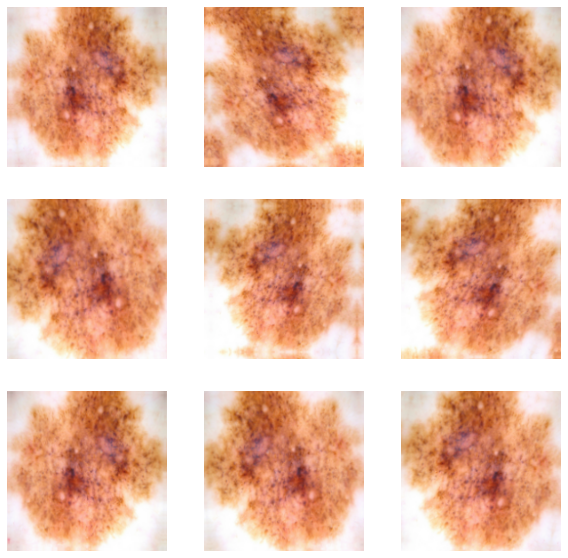

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')
        
plt.show()
        

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])


In [21]:
### Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)       

### Training the model


In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/20
56/56 [==============================] - 67s 1s/step - loss: 2.3261 - accuracy: 0.1775 - val_loss: 2.0231 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 66s 1s/step - loss: 1.8819 - accuracy: 0.2919 - val_loss: 1.9577 - val_accuracy: 0.3266
Epoch 3/20
56/56 [==============================] - 66s 1s/step - loss: 1.6446 - accuracy: 0.4007 - val_loss: 1.6648 - val_accuracy: 0.4385
Epoch 4/20
56/56 [==============================] - 67s 1s/step - loss: 1.5344 - accuracy: 0.4515 - val_loss: 1.5768 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 66s 1s/step - loss: 1.4940 - accuracy: 0.4715 - val_loss: 1.6245 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 67s 1s/step - loss: 1.4254 - accuracy: 0.5061 - val_loss: 1.3924 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 66s 1s/step - loss: 1.3535 - accuracy: 0.5084 - val_loss: 1.3606 - val_accuracy: 0.5302
Epoch 8/20
56/56 [==

### Visualizing the results


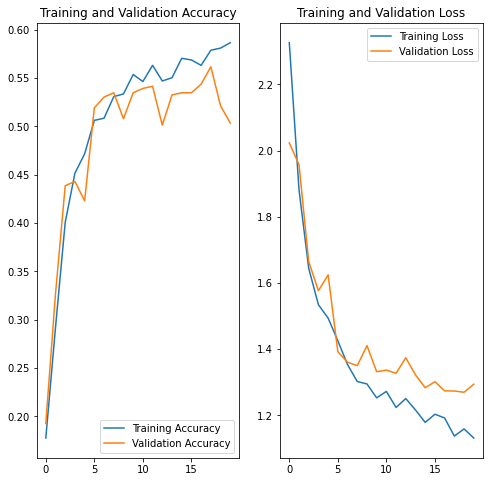

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Because of including data augmentation & dropouts, we see linear increase in both training accuracy & validation accuracy. There is no overfitting by the model. However, we do not see noticeable increase in trainig & validation accuracy. 

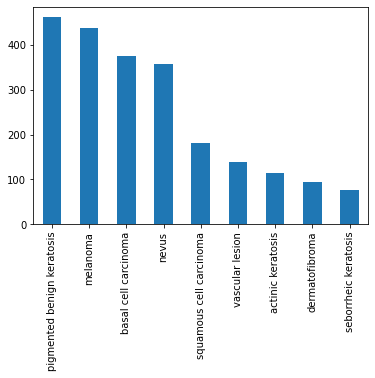

In [27]:
path_list = [x for x in data_dir_train.glob('*/*.jpg')]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob('*/*.jpg')]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()), columns = ['Path', 'Label'])
original_df['Label'].value_counts().plot(kind = 'bar')
plt.show()

We see a class imbalance across the dataset

Seborrheic keratosis has the least number of samples.

pigmented benign keratosis(20%), melanoma(19.5%), basal cell carcinoma(17%), nevus(16%) are the classes which dominate the data

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3 Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F8051A280>:   1%|▏         | 7/500 [00:00<00:53,  9.25 Samples/s]                  

Initialised with 114 image(s) found.
Output directory set to C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22F804F5250>: 100%|██████████| 500/500 [00:04<00:00, 101.07 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22FEF050DF0>: 100%|██████████| 500/500 [00:07<00:00, 63.15 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F8052D910>:   1%|          | 5/500 [00:00<00:24, 19.83 Samples/s]                  

Initialised with 95 image(s) found.
Output directory set to C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F804426A0>: 100%|██████████| 500/500 [00:07<00:00, 66.85 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=2198x1603 at 0x22FEEF5A130>: 100%|██████████| 500/500 [00:38<00:00, 12.92 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22FEEEEEF10>:   0%|          | 1/500 [00:00<01:25,  5.82 Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x22FA2014E20>: 100%|██████████| 500/500 [00:33<00:00, 14.79 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]


AttributeError: 'FileNotFoundError' object has no attribute 'message'

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [50]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

2500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\saumi\\Downloads\\Upgrad_Nilot\\CNN_Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_83b1d760-506e-46fd-b97f-b5cb79751c71.jpg',
 'C:\\Users\\saumi\\Downloads\\Upgrad_Nilot\\CNN_Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8c8f6e5a-2253-4230-8754-9aab54747117.jpg',
 'C:\\Users\\saumi\\Downloads\\Upgrad_Nilot\\CNN_Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9546b360-647d-437d-98a3-b472155841c0.jpg',
 'C:\\Users\\saumi\\Downloads\\Upgrad_Nilot\\CNN_Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [46]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,actinic keratosis
1,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,actinic keratosis
2,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,actinic keratosis
3,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,actinic keratosis
4,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,actinic keratosis
...,...,...
2495,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,nevus
2496,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,nevus
2497,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,nevus
2498,C:\Users\saumi\Downloads\Upgrad_Nilot\CNN_Assi...,nevus


In [51]:
new_df = original_df.append(df2)

In [52]:
new_df['Label'].value_counts()

melanoma                      938
basal cell carcinoma          876
nevus                         857
actinic keratosis             614
dermatofibroma                595
pigmented benign keratosis    462
squamous cell carcinoma       181
vascular lesion               139
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
data_dir_train=pathlib.Path("C:/Users/saumi/Downloads/Upgrad_Nilot/CNN_Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4739 files belonging to 9 classes.
Using 3792 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4739 files belonging to 9 classes.
Using 947 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

#### **Todo:**  Train your model

In [54]:
epochs = 30
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/30
119/119 [==============================] - 338s 3s/step - loss: 3.3652 - accuracy: 0.3998 - val_loss: 2.3166 - val_accuracy: 0.1679
Epoch 2/30
119/119 [==============================] - 363s 3s/step - loss: 1.3407 - accuracy: 0.5530 - val_loss: 3.3902 - val_accuracy: 0.1742
Epoch 3/30
119/119 [==============================] - 381s 3s/step - loss: 1.1658 - accuracy: 0.6216 - val_loss: 2.3677 - val_accuracy: 0.1447
Epoch 4/30
119/119 [==============================] - 387s 3s/step - loss: 1.0087 - accuracy: 0.6735 - val_loss: 2.8600 - val_accuracy: 0.3516
Epoch 5/30
119/119 [==============================] - 385s 3s/step - loss: 0.8400 - accuracy: 0.7265 - val_loss: 1.5388 - val_accuracy: 0.5164
Epoch 6/30
119/119 [==============================] - 388s 3s/step - loss: 0.6872 - accuracy: 0.7664 - val_loss: 1.9129 - val_accuracy: 0.4794
Epoch 7/30
119/119 [==============================] - 417s 4s/step - loss: 0.6259 - accuracy: 0.8012 - val_loss: 2.1645 - val_accuracy: 0.5206

#### **Todo:**  Visualize the model results

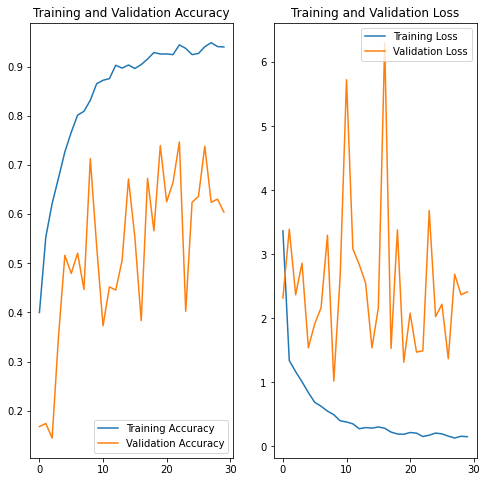

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We observe no overfitting and class rebalance helped in avoiding overfitting. We see a difference in training and validation accuracy, meaning that the model can be improved further. This can done by adding more Droupout layers 